#pytorch workflow


In [2]:
import torch
from torch import nn # nn contains all pytorch building blocks for neural network
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.6.0+cu124'

# 1.Data preparing and loading

data can be anything in machine learning

ml in two parts:
1.get data into numerical data
2.build model to find patterns in data

In [3]:
# creating a linear regression using formula to make straight line

weight=0.7
bias=0.3  # Bias : model consistently make errors in a specific direction due to incorrect assumptions or over simplifications in model or training data

# create a range of num
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight * X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(Y)

(50, 50)

In [5]:
# split data to training and testing data
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]

In [6]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

In [7]:
# data visualization using matplot
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})


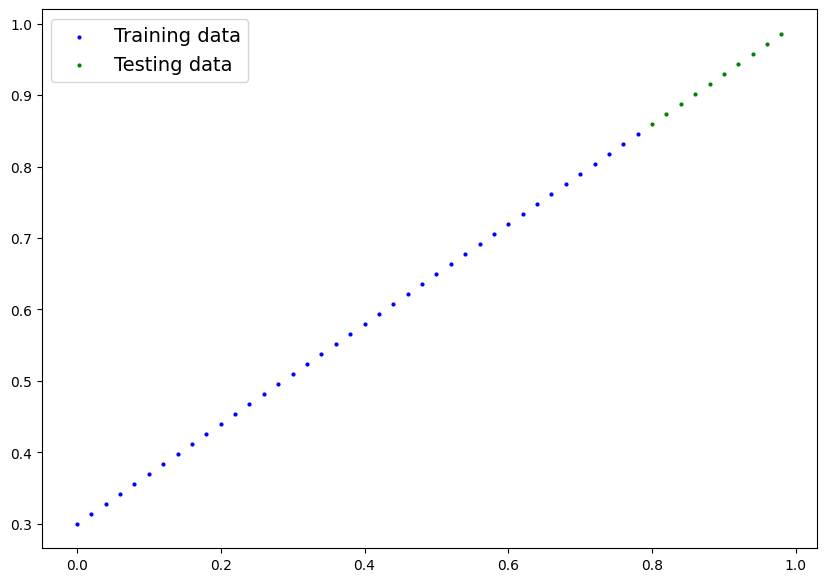

In [8]:
plot_predictions()

In [9]:
# building pytorch model
# linear regression model class

class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    # requires_grad a boolean attribute that indicate whether gradients should be computed for tensor during the backward pass(backpropagation)
    self.weights=nn.Parameter(torch.rand(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias=nn.Parameter(torch.rand(1,
                                      requires_grad=True,
                                      dtype=torch.float))

    # forward method to define computation model
  def forward(self,x:torch.Tensor)->torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias

# start with random values weight and bias look at training data and adjust the random values to represent a straight line
# through algorithm like
# 1.Gradient Descent
# 2.Backpropogation


***Gradient Descent*** : An iterative optimization algorithm used in machine learning to find the minimum value of a function often a cost or loss function


---


***Backpropogation*** : it is an algorithm used to train artifical neural network by adjusting the networks weights to minimize the difference between the predicted and the actual traget output




# pytorch model building essentials

* torch.nn  - contains all of the computational graphs(neural networks)
* torch.nn.parameter _ what parameters should our model try and learn often a pytorch layer from torch.nn

* torch.optimz - it is where gradient descent is implemented




In [10]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [11]:
# it sets the seed for PyTorch's random number generator to 42, so that any operation that involves randomness
 #(e.g., random weights, shuffling, dropout) will produce the same results every time you run the code.


torch.manual_seed(4)
torch.rand(3)

tensor([0.5596, 0.5591, 0.0915])

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [13]:
# making predictions using 'torch.inference_mode()'

with torch.inference_mode(): # inference turns off the gradients tracking
# maximize speed minimize the memory usage
  y_preds=model_0(X_test)
# it is similar to inference mode turns off gradient tracking however inference is
with torch.no_grad():
  y_preds=model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

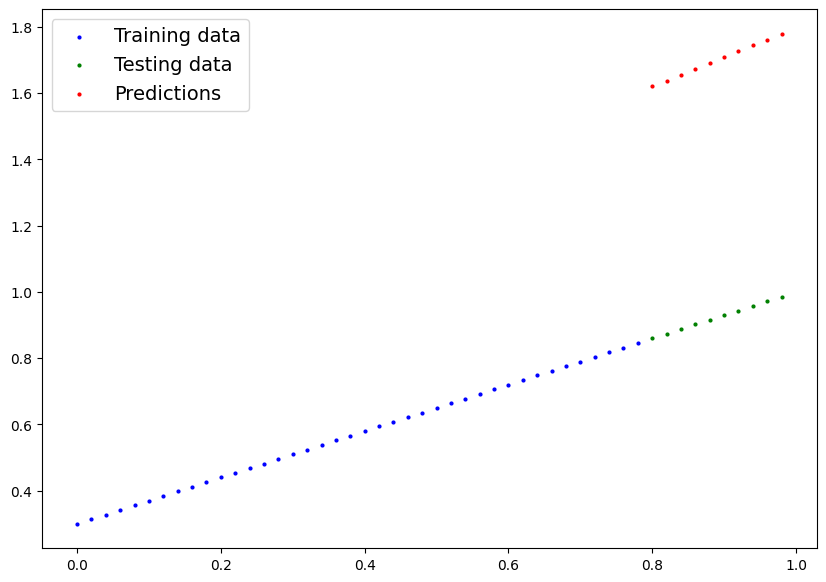

In [14]:
plot_predictions(predictions=y_preds)

# Train Model

 the whole idea of training is for a model to move from some unknown parameter to some known parameters

 in other words poor representation of data to a better representation of data
 we can measure how poor your models predictions are to use a loss function

 **Loss function :** a function to measure how wrong your models predictions are to the ideal output

 lower is better

**Types of loss functions**
*  Mean Squared Error (MSE),
*  Mean Squared Error (MSE),
*  Mean Absolute Error (MAE),
*  Binary Cross-Entropy,
*  Categorical Cross-Entropy,
*  Huber Loss.

**Optimizer :** takes into account the loss of a model and adjusts the models parameter to improve loss function

specifically for pytorch:

* training loop
* testing loop


Regession cost functions : Cost functions in machine learning can be broadly classified into Regression cost functions, Binary Classification cost functions, and Multi-class Classification cost functions

Types :
1. regression cost functions
2. Binary classification cost functions
3. Multi class classification cost functions





In [15]:
model_0.parameters()

<generator object Module.parameters at 0x7d8b48844e40>

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

# working of machine learning models

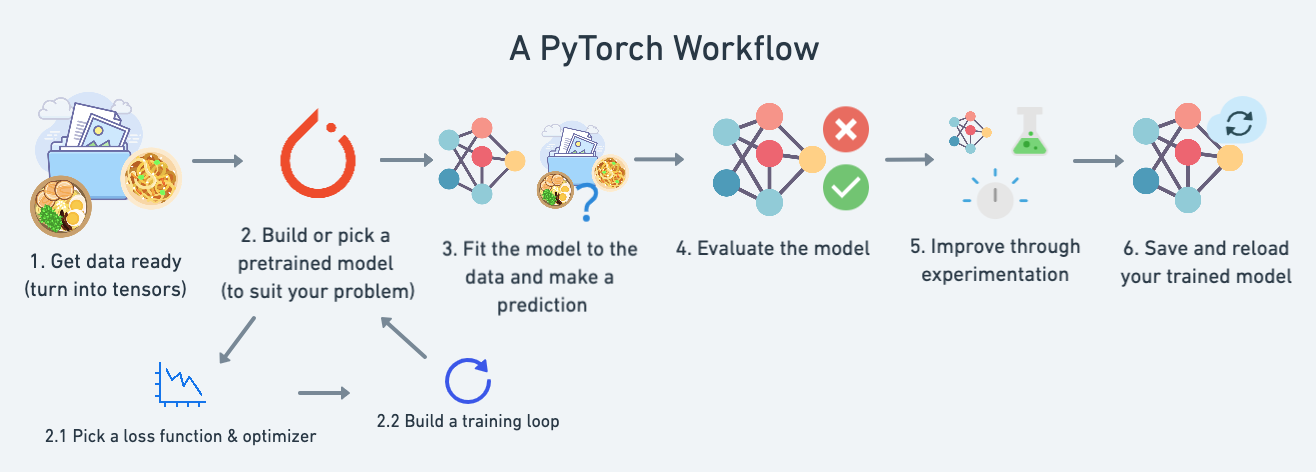


Steps for Pytorch workflow




1.   Get data ready : torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader

2.   build a pretrained model :
 torch.nn.module, torchvision.models, torch.optim

3.   Evaluate the model : torch.metrics

4.   improve through expermentation :
torch.utils.tensorboard

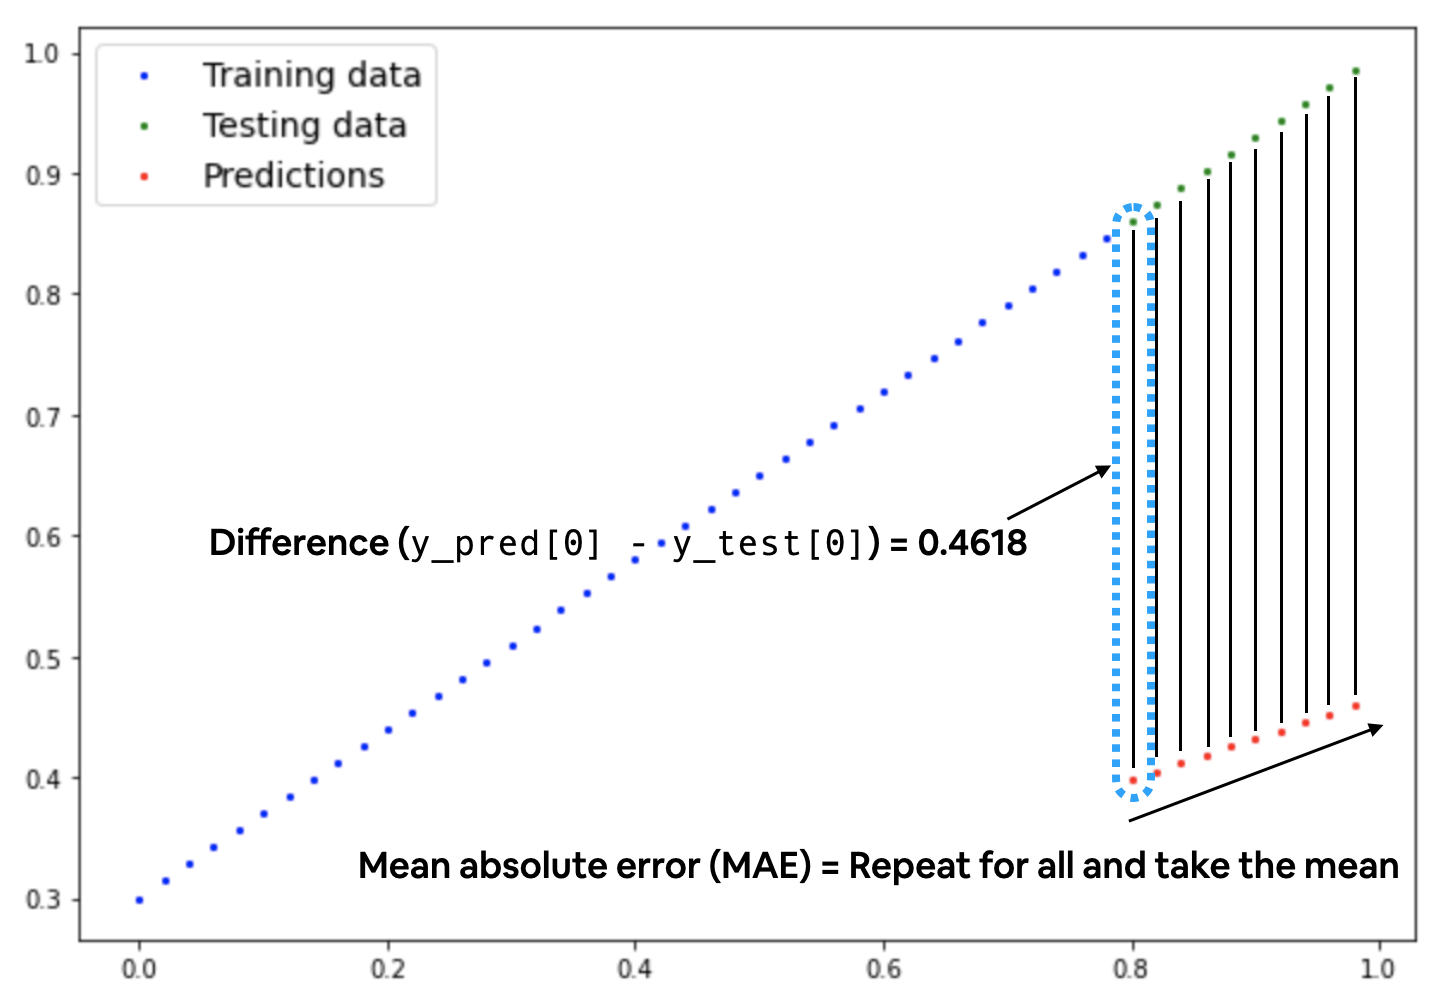




In [17]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) # parameters of target model to optimize
# learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

# building a training loop in pytorch
things we need in a training loop :

!.loop through the data

2.forward pass (involves data moving through our models forward()) to make plot_predictions

3.calculate the loss

4.loss backward - move backwards through networks to calculate gradients  of each parameter of our model

5.optimize step - use optimizer to adjust models parameter try and improve the loss





#
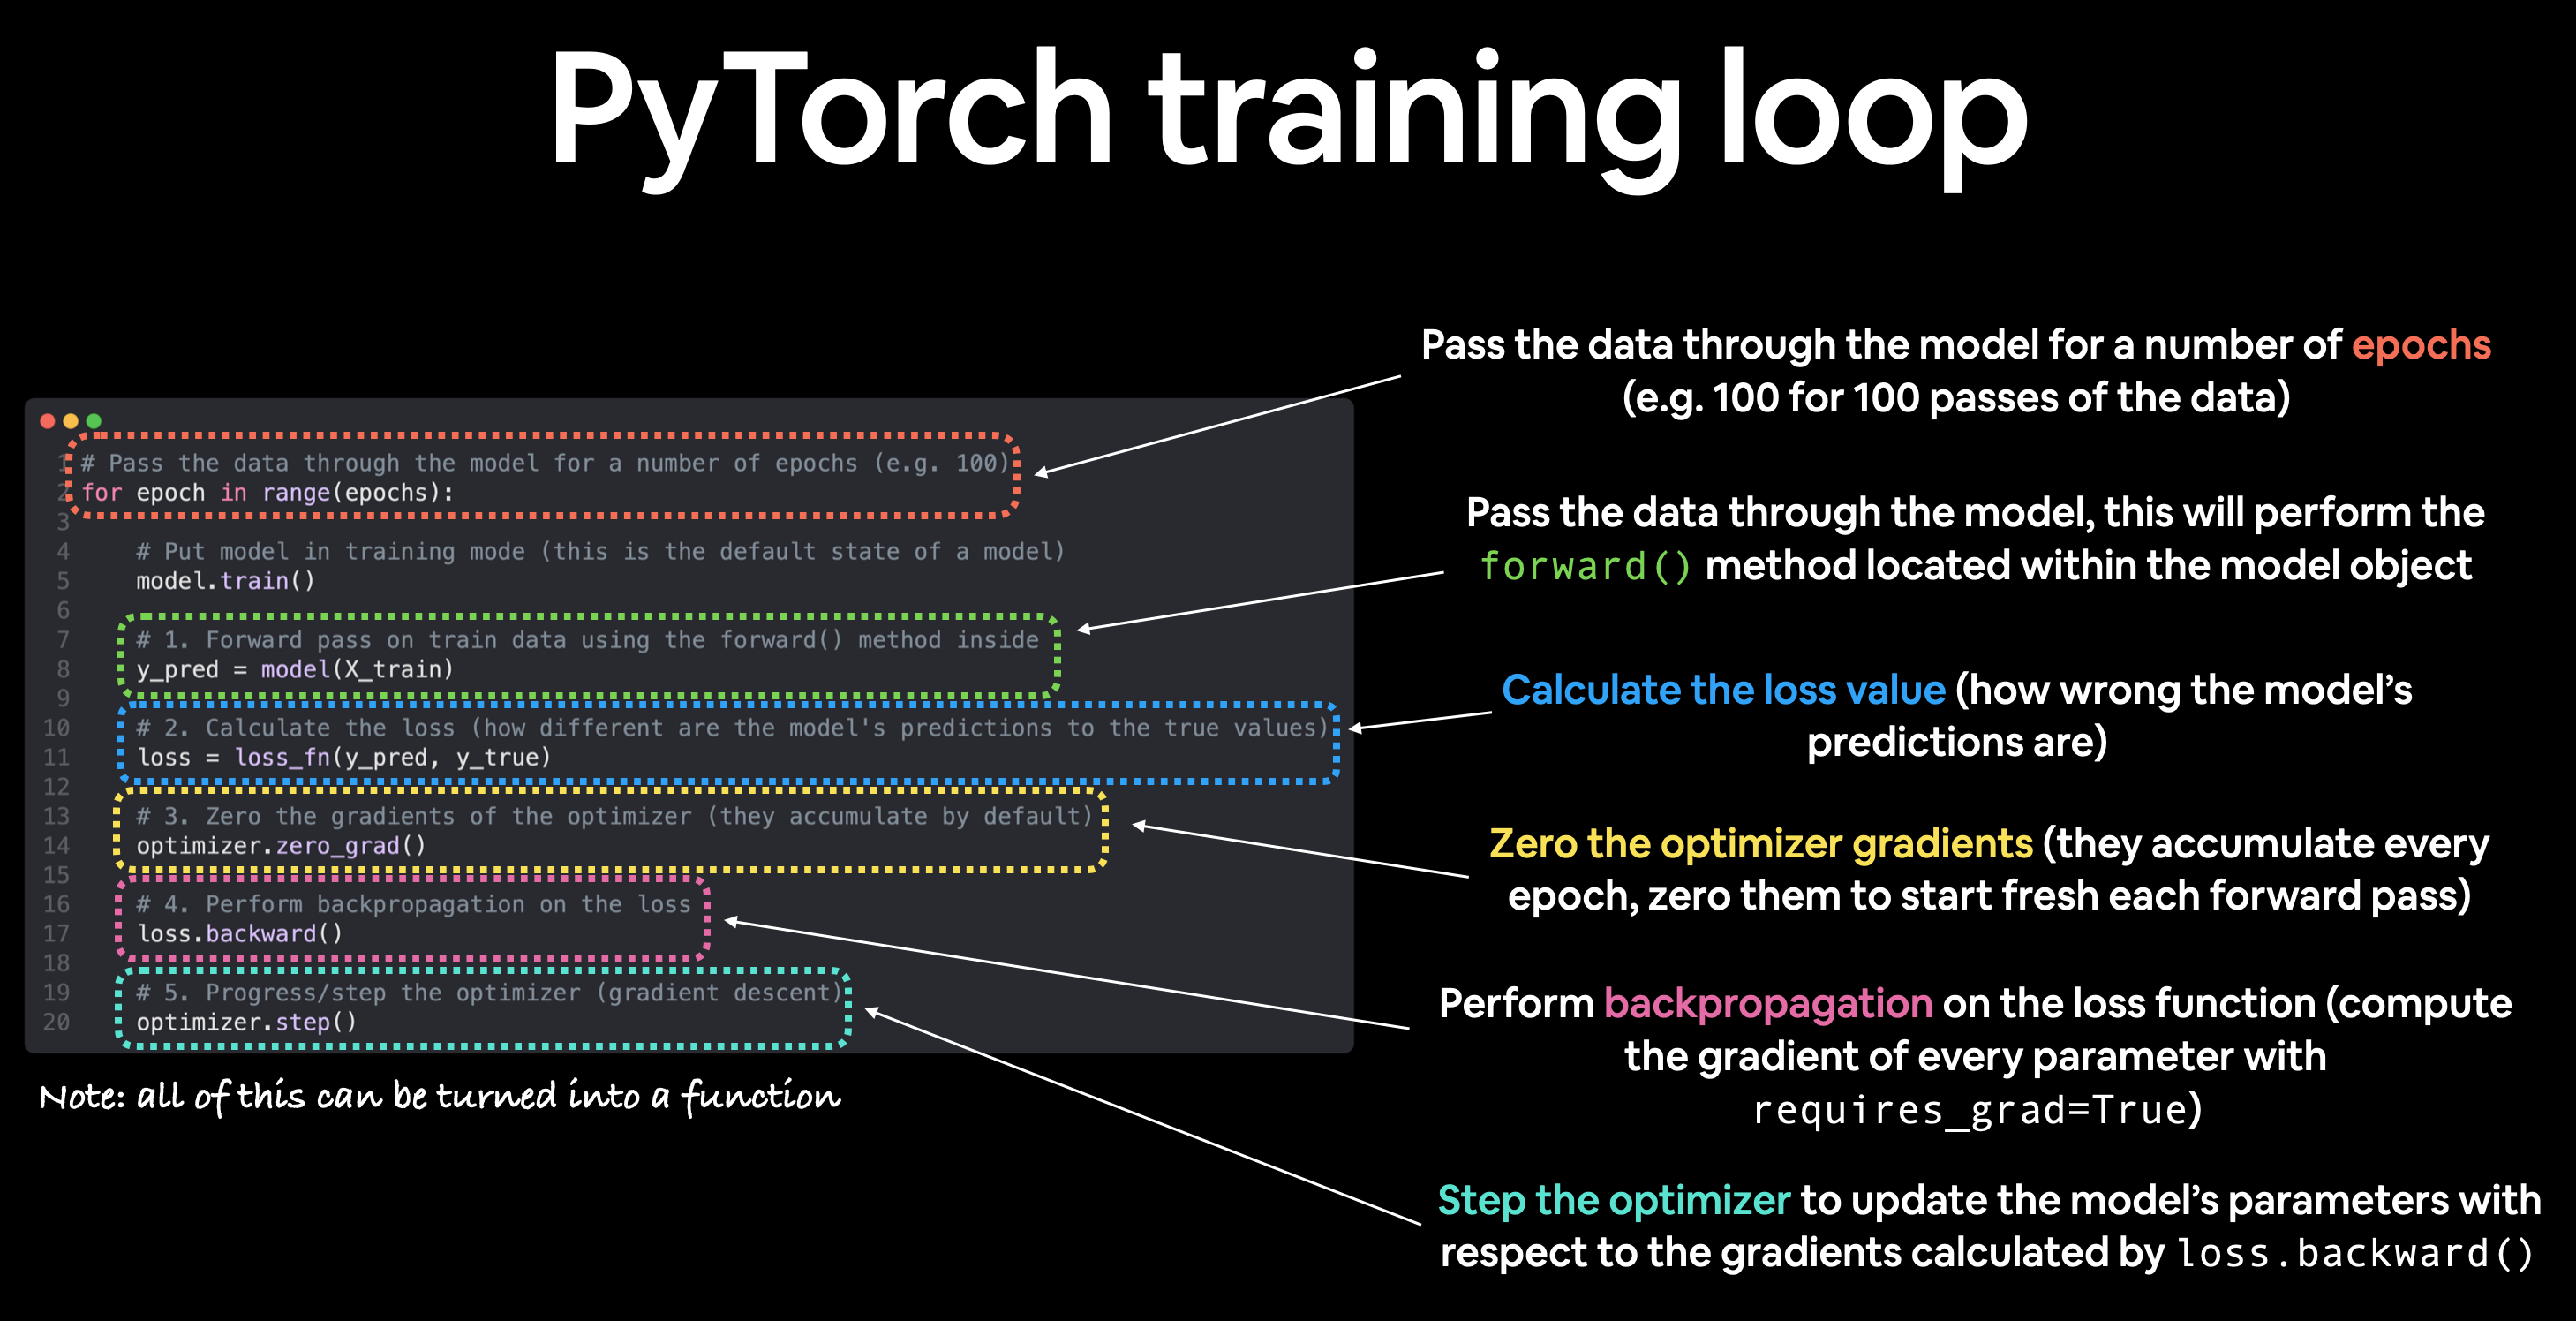

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [19]:
torch.manual_seed(42)
# epcoh is one loop through the data
epochs=200


### training
for epoch in range(epochs):
  model_0.train() # put model in training mode it is the default mode
 # forward pass
  y_preds =model_0(X_train.float())

 # calculate the loss
  loss = loss_fn(y_preds,Y_train.float())
  print(f'loss{loss}')

 # optimizer zero grad
  optimizer.zero_grad()
 # This line is commonly used in PyTorch training loops to reset the gradients of all model parameters before the backward pass.

 # perform back propogation loss with rescept to paramerters of model
  loss.backward()

 # optimizer step (perform gradient descent)
  optimizer.step()
  with torch.inference_mode(): #  turns off the gradient tracking
  # do forward pass
   test_preds = model_0(X_test)
   test_loss=loss_fn(test_preds,Y_test)




 # tracks different values
epoch_count =[]
loss_values =[]
test_loss_values=[]

for epocah in range(epochs):
### testing
  model_0.eval() # turn off different settings in model which are not necessary



  if epoch % 10 == 0:
     # calculate the loss

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)



# for inputs, targets in dataloader:
#     optimizer.zero_grad()       # 1. Clear previous gradients
#     outputs = model(inputs)     # 2. Forward pass
#     loss = loss_fn(outputs, targets)  # 3. Compute loss
#     loss.backward()             # 4. Backward pass
#     optimizer.step()            # 5. Update parameters



loss0.6860889196395874
loss0.6745679974555969
loss0.6630470156669617
loss0.6515260338783264
loss0.6400049924850464
loss0.6284840703010559
loss0.6169630289077759
loss0.6054420471191406
loss0.5939210653305054
loss0.5824000239372253
loss0.5708791017532349
loss0.5593580603599548
loss0.5478371381759644
loss0.5363161563873291
loss0.5247951149940491
loss0.5132741332054138
loss0.5017532110214233
loss0.4902321696281433
loss0.47871121764183044
loss0.4671902060508728
loss0.45566922426223755
loss0.4441482126712799
loss0.43262726068496704
loss0.4211062490940094
loss0.40958523750305176
loss0.3980643153190613
loss0.38654330372810364
loss0.375022292137146
loss0.36350134015083313
loss0.3519803285598755
loss0.34045934677124023
loss0.328938364982605
loss0.31741735339164734
loss0.3058963716030121
loss0.2943754196166992
loss0.2828544080257416
loss0.2713334262371063
loss0.25981244444847107
loss0.24829146265983582
loss0.23677048087120056
loss0.2252494841814041
loss0.21372847259044647
loss0.20220749080181122


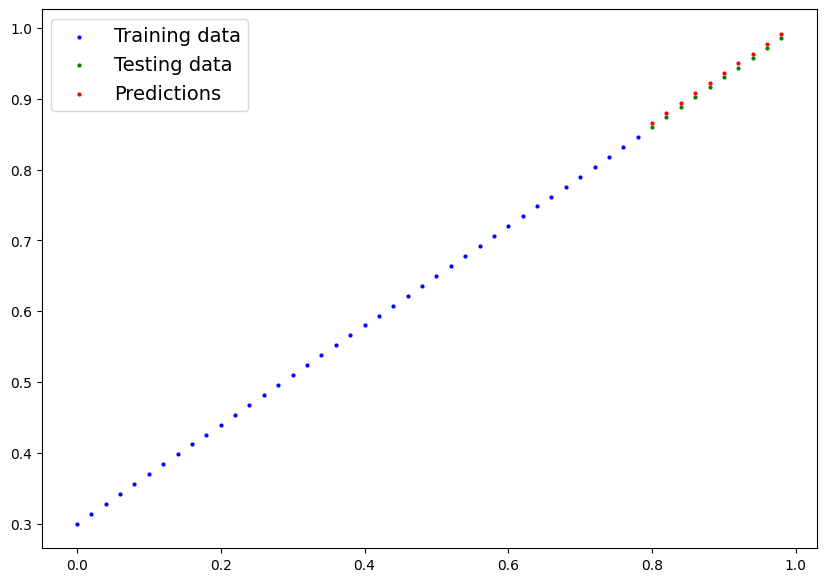

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test.float())

plot_predictions(predictions=y_preds_new)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [22]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([], dtype=float32), [])

In [23]:
test_loss_values

[]

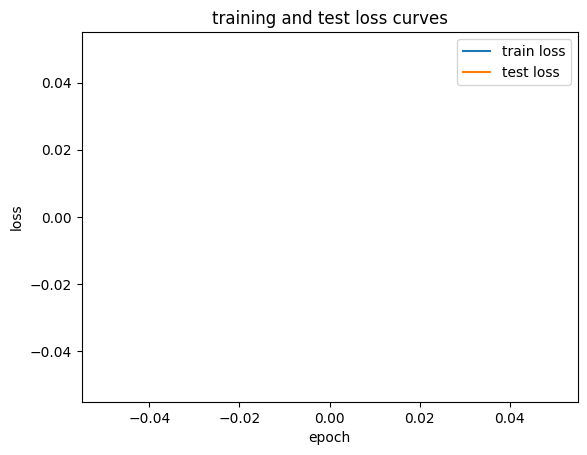

In [24]:
# plot the loss curves
#epoch_count, loss_values, test_loss_values

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()),label='train loss')
plt.plot(epoch_count, test_loss_values,label='test loss')
plt.title('training and test loss curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();

# Saving a model in Pytorch

three main methods to saving and loading models in Pytorch

1. `torch.save()` - allows to save the model
2. `torch.load()` -allows load a saved model
3. `torch.nn.Module.load_saved_dict()` - this allows to load a saved state dictionary

In [25]:
# save pytorch model

from pathlib import Path

# create a models directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME ="1_Pytorch_workflow.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
# save the model state dict
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [26]:
MODEL_SAVE_PATH

PosixPath('models/1_Pytorch_workflow.pt')

In [27]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1562 Jul 19 05:38 1_Pytorch_workflow.pt


# ` loading a pytorch model`



In [28]:
# to load in a saved dict we have to instatntiate a new instance of our  model class

loaded_model_0=LinearRegressionModel()

# load the saved state_dict of model_0

In [29]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [31]:
# make some predictions with loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [32]:
model_0.eval()

with torch.inference_mode():
  y_preds= model_0(X_test)

y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [33]:
# compare model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [34]:
# putting all together

import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [35]:
# setup device
device="cuda" if torch.cuda.is_available() else "cpu"
print(f'device: {device}')

# create a linear regression model class

device: cpu


In [36]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Data

In [37]:
# create data using linear regression y = mx + c
weigth =0.7
bias = 0.3



#create x and y
x=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=weight * x + bias

x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [38]:
# split the data

train_split = int(0.8* len(x))
x_train,y_train = x[:train_split],y[:train_split]
x_test,y_test = x[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

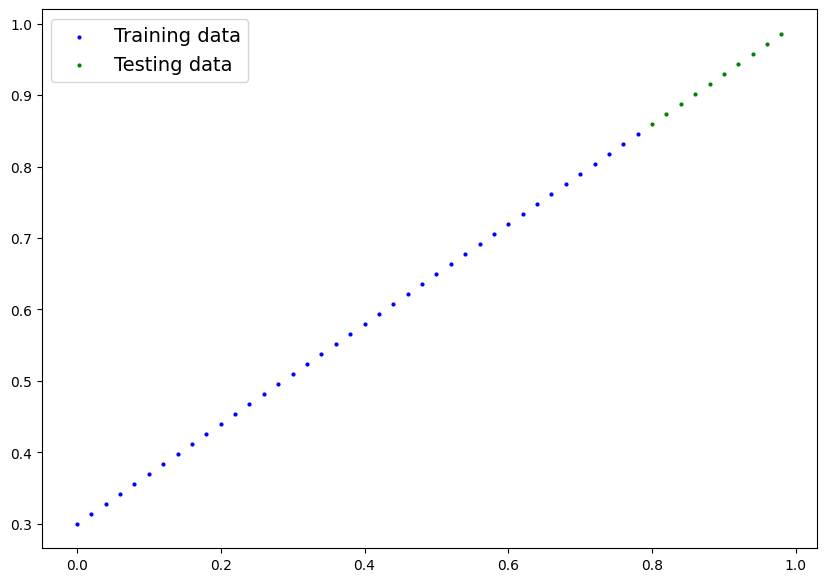

In [39]:
# plot the data

plot_predictions(x_train,y_train,x_test,y_test)

In [45]:
class LinearRegressionModelv2(nn.Module):
  def __int__(self):
    super().__int__()
    # self.weights = nn.parameters(torch.randn(1,requires_grad=True))
    # self.bias = nn.parameters(torch.randn(1,requires_grad=True))

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
  #  return self.weights * x + self.bias

# set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelv2()


In [41]:
model_1,model_1.state_dict()

(LinearRegressionModelv2(), OrderedDict())

In [42]:
model_1.state_dict()

OrderedDict()

In [43]:
torch.cuda.is_available()

False

In [ ]:
# training a model

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

# training loop

torch.manual_seed(42)

epochs =200

# device diagnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

for epoch in range(epochs):
   model_1.train()

   # forward pass
   y_preds =model_1(x_train)

   # calculate the loss
   loss = loss_fn(y_preds,y_train)

   # optimizer zero grad
   optimizer.zero_grad()

   # traverse back backwards in nn
   loss.backward()

   optimizer.step()

   model_1.eval()

In [ ]:
# testing

with torch.inference_mode():

  test_pred = model_1(x_test)

  test_loss = loss_fn(test_pred,y_test)

  if epoch % 10==0:
    print(f"epoch{epoch} | loss{loss}")

In [46]:
# making and evaluating predictions

model_1.eval()

with torch.inference_mode():
  y_pred = model_1(x_test)

y_pred

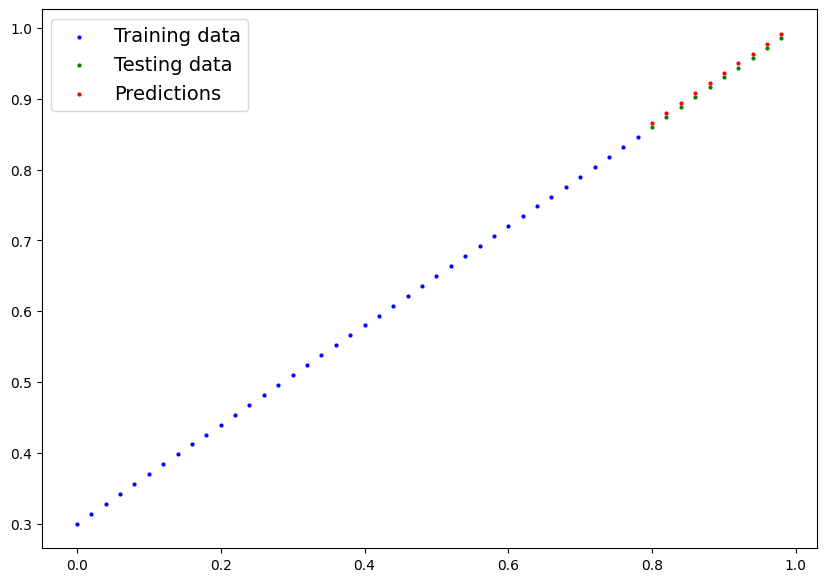

In [47]:
plot_predictions(predictions=y_preds)

In [48]:
weight, bias

(0.7, 0.3)

In [50]:
# saving a model
from pathlib import Path

MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


MODEL_NAME = "Pytorch_model_2.pt"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

print(f"saving model {MODEL_SAVE_PATH}")

saving model models/Pytorch_model_2.pt


In [51]:
model_1.state_dict()

OrderedDict()

In [54]:
# load model

Load_model1 = LinearRegressionModelv2()

#load saved model
Load_model1.load_state_dict(torch.load(MODEL_SAVE_PATH))

Load_model1.state_dict()

OrderedDict()

In [53]:
# evaluate
Load_model_1.eval()

with torch.inference_mode():
  y_preds = Loade_model_1(x_test)

y_preds == loaded_model_preds